In [24]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [25]:
# Librerías básicas
import pandas as pd
import numpy as np

# Librerías de visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Librerías de Machine Learning
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
from sklearn.neighbors import KNeighborsRegressor

In [26]:
df = pd.read_csv("kc_house_data.csv")
df.head().T

,0,1,2,3,4
id,7129300520,6414100192,5631500400,2487200875,1954400510
date,20141013T000000,20141209T000000,20150225T000000,20141209T000000,20150218T000000
price,221900.0,538000.0,180000.0,604000.0,510000.0
bedrooms,3,3,2,4,3
bathrooms,1.0,2.25,1.0,3.0,2.0
sqft_living,1180,2570,770,1960,1680
sqft_lot,5650,7242,10000,5000,8080
floors,1.0,2.0,1.0,1.0,1.0
waterfront,0,0,0,0,0
view,0,0,0,0,0


1.Quito columnas que no me aportan nada

In [27]:
df = df.drop(['id', 'date',"lat","long"], axis=1)

In [28]:
df.head().T

,0,1,2,3,4
price,221900.0,538000.00,180000.0,604000.0,510000.0
bedrooms,3.0,3.00,2.0,4.0,3.0
bathrooms,1.0,2.25,1.0,3.0,2.0
sqft_living,1180.0,2570.00,770.0,1960.0,1680.0
sqft_lot,5650.0,7242.00,10000.0,5000.0,8080.0
floors,1.0,2.00,1.0,1.0,1.0
waterfront,0.0,0.00,0.0,0.0,0.0
view,0.0,0.00,0.0,0.0,0.0
condition,3.0,3.00,3.0,5.0,3.0
grade,7.0,7.00,6.0,7.0,8.0


2.Hemos visto que no hay nulos.

In [29]:
df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
sqft_living15    0
sqft_lot15       0
dtype: int64

3. No hay variables categóricas

In [30]:
df.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
sqft_living15      int64
sqft_lot15         int64
dtype: object

4.OUTLIERS

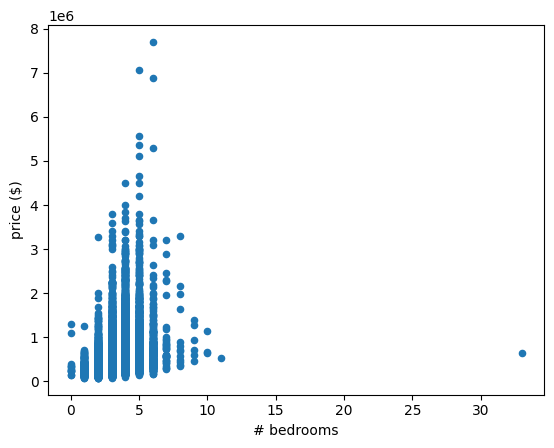

In [31]:
df.plot(kind = 'scatter',x='bedrooms',y = 'price')
plt.xlabel('# bedrooms')
plt.ylabel('price ($)')
plt.show()

In [32]:
df["bedrooms"].value_counts()

bedrooms
3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: count, dtype: int64

Para mas de 6 habitaciones, empieza a ser una anomalia

In [33]:
df_filtered = df[df['bedrooms'] <= 6]

In [34]:
df_filtered['bedrooms'].value_counts()

bedrooms
3    9824
4    6882
2    2760
5    1601
6     272
1     199
0      13
Name: count, dtype: int64

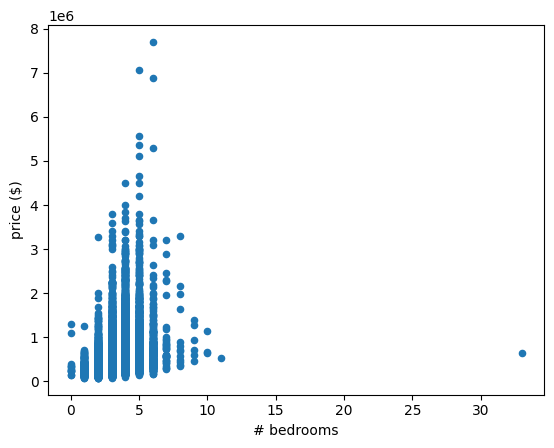

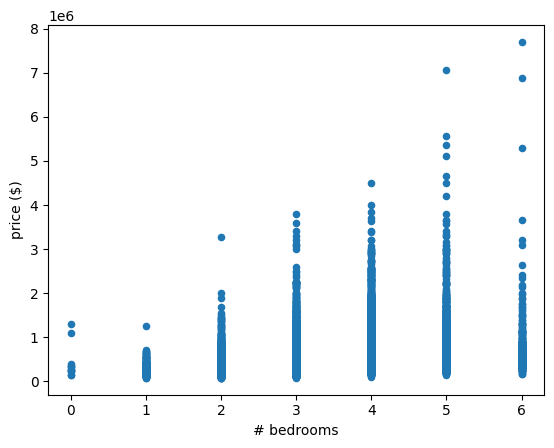

In [35]:
df.plot(kind = 'scatter',x='bedrooms',y = 'price')
plt.xlabel('# bedrooms')
plt.ylabel('price ($)')
plt.show()

df_filtered.plot(kind = 'scatter',x='bedrooms',y = 'price')
plt.xlabel('# bedrooms')
plt.ylabel('price ($)')
plt.show()

In [36]:
print(f'Original: {df.shape[0]}\nFiltered: {df_filtered.shape[0]}')
print(f'Diferencia: {(df.shape[0] - df_filtered.shape[0])/df.shape[0]*100}%')

Original: 21613
Filtered: 21551
Diferencia: 0.2868643871743858%


La diferencia de datos no es muy grande, lo aceptamos

In [37]:
df = df_filtered

5.Quito variables muy correlacionadas.
En el EDA hemos visto que estan intimamente relacionados sqft_above y sqft_living, puedo eliminar uno de ellos.

In [38]:
df = df.drop(['sqft_above'], axis=1)